## ORSO example fit

We use the [anaklasis](https://github.com/alexandros-koutsioumpas/anaklasis) package to fit the ORSO example data (data file *ORSO_example.ort*) that contains 4-column data (_Q,R,dR,dQ_). The data come from a Neutron Reflectivity measurement of a Si/SiO2/Polymer/D2O system.

we first import *anaklasis.ref*

In [1]:
from anaklasis import ref

we then name the project, import input data, set _Q_ units in Angstrom (as they are in the input file) and also set pointwise resolution since our file contains _dQ_ data.

In [2]:
project='ORSO_example'
in_file=['ORSO_example.ort']
units=['A'] # Angstrom units
resolution=[-1] # poitwise resolution

we then create our model where we assume that the polymer layer has no solvent penetration.

In [3]:
model=[
	# Re_sld Im_sld  thk  rough solv description
	[  2.07e-6, 0.0,  0,   'p0', 0.0, 'Si'],
	[  3.47e-6, 0.0, 'p1', 'p2', 0.0, 'SiO2'],
	[   'p3',   0.0, 'p4', 'p5', 0.0, 'Polymer'],
	[  6.35e-6, 0.0,  0,    0,   1.0, 'D2O'],
	]

We have a single model in the system covering uniformly the whole substrate (single patch), so

In [4]:
system=[model]
patches=[1.0]

we have entered 6 parameters in total in the model. Let's define their bounds together with their descriptions. Note that we consider that all parameters have a uniform probability to assume a value between the declared bounds.

In [5]:
global_param = [
    # param  min  max  description    type
	['p0', 0, 5, 'Si_SiO2_roughness','uniform'],
	['p1', 0, 100, 'SiO2_thickness','uniform'],
	['p2', 0, 50, 'SiO2_Polymer_roughness','uniform'],
	['p3', -0.5e-6, 3.0e-6, 'Polymer_sld','uniform'],
	['p4', 0, 700, 'Polymer_thickness','uniform'],
	['p5', 0, 80, 'Polymer_D2O_roughness','uniform'],
	]

although not necesary, we may require that the thickness of the SiO2 and polymer layers stays always larger than their roughness. We can do that using two inequality constraints

In [6]:
constraints = ['p1>p2','p4>p5']

We have no multi-parameters to declare (they are usually used for multiple contrast refinements), so

In [7]:
multi_param = [] # no multi-parameters

We then leave the scale and the background a bit free to vary during the refinemenet

In [8]:
background = [[0.0,1.0e-6,'uniform']] 
scale = [[0.9,1.1,'uniform']]

Then we set the fit details and call the _ref.fit_ function to perform the data refinement

--------------------------------------------------------------------
Program ANAKLASIS - Fit Module for X-ray/Neutron reflection datasets
version 1.4, June 2021
developed by Dr. Alexandros Koutsioumpas. JCNS @ MLZ
for bugs and requests contact: a.koutsioumpas[at]fz-juelich.de
--------------------------------------------------------------------
Project name: ORSO_example
Using chi squared with errors figure of merit (FOM)
Fast fit mode. Using small differential evolution population size
Parameter uncertainity calculation by Hessian matrix estimation
A plot summarizing results will pop-up after the end of the calculation


Directory already exists.. overwriting data..
file#0 experimental points: 408
Q units in inverse A
dQ/Q pointwise
fit weight:  1
free parameters =  8


list of free parameters: p0 (Si_SiO2_roughness),p1 (SiO2_thickness),p2 (SiO2_Polymer_roughness),p3 (Polymer_sld),p4 (Polymer_thickness),p5 (Polymer_D2O_roughness),bkg curve#0,scale curve#0,

Running differential evoluti

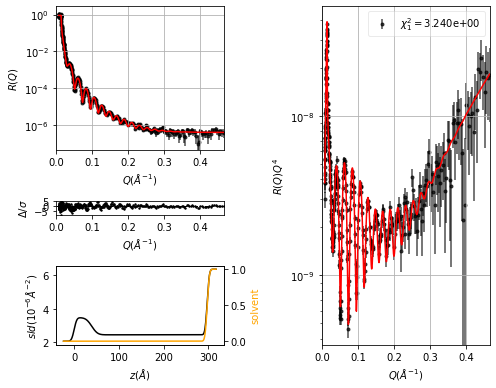

--------------------------------------------------------------------
Final model parameters
--------------------------------------------------------------------


Curve #0


Instrumental Resolution, dQ/Q: pointwise
fit weigth: 1
--------------------------------------------------------------------
Si real sld (10^-6 A^-2)      = 2.07 (fixed)
Si imaginary sld (10^-6 A^-2) = 0.00 (fixed)
Si thickness (A)              = 0.00 (fixed)
Si/SiO2 roughness (A) = 4.69 (parametric), -> p0
Si solvent volume fraction    = 0.00 (fixed)
--------------------------------------------------------------------
SiO2 real sld (10^-6 A^-2)      = 3.47 (fixed)
SiO2 imaginary sld (10^-6 A^-2) = 0.00 (fixed)
SiO2 thickness (A)              = 39.30 (parametric), -> p1
SiO2/Polymer roughness (A) = 10.21 (parametric), -> p2
SiO2 solvent volume fraction    = 0.00 (fixed)
--------------------------------------------------------------------
Polymer real sld (10^-6 A^-2)      = 2.45 (parametric), -> p3
Polymer imaginary

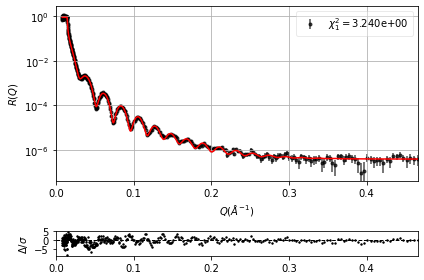

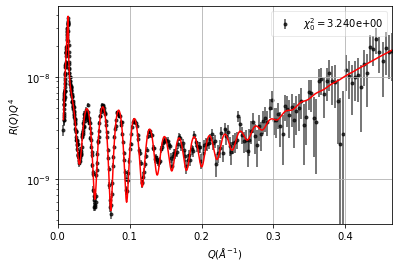

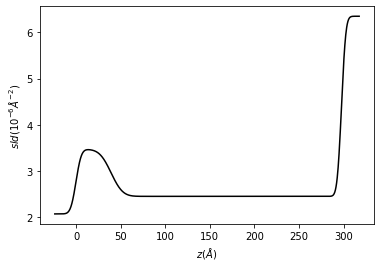

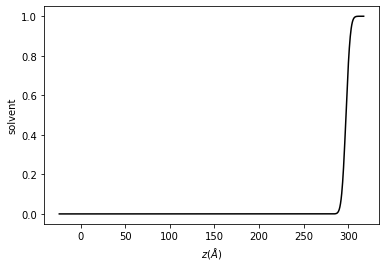

In [9]:
fit_mode=0 # using FOM1
fit_weight=[1] 
method = 'simple' # Uncertainty estimated through Hessian matrix

res = ref.fit(project, in_file, units, fit_mode,
fit_weight,method,resolution,patches, system,
global_param,multi_param, constraints,
background,scale,experror=True)

We get a relatively good fit of the data using the declared model. We can go futher and run an MCMC sampling of the system in order to get an even better estimation of parameter correlation and uncertainity comparing to our previous estimation of uncertainity using a Hessian matrix evaluation.

--------------------------------------------------------------------
Program ANAKLASIS - Fit Module for X-ray/Neutron reflection datasets
version 1.4, June 2021
developed by Dr. Alexandros Koutsioumpas. JCNS @ MLZ
for bugs and requests contact: a.koutsioumpas[at]fz-juelich.de
--------------------------------------------------------------------
Project name: ORSO_example
Using chi squared with errors figure of merit (FOM)
Fast fit mode. Using small differential evolution population size
Parameter uncertainity calculation using Markov Chain Monte Carlo
A plot summarizing results will pop-up after the end of the calculation


Directory already exists.. overwriting data..
file#0 experimental points: 408
Q units in inverse A
dQ/Q pointwise
fit weight:  1
free parameters =  8


list of free parameters: p0 (Si_SiO2_roughness),p1 (SiO2_thickness),p2 (SiO2_Polymer_roughness),p3 (Polymer_sld),p4 (Polymer_thickness),p5 (Polymer_D2O_roughness),bkg curve#0,scale curve#0,

Running differential evolu

100%|██████████| 500/500 [00:21<00:00, 23.06it/s]
N/50 = 10;
tau: [51.139 34.231 64.271 64.022 32.202 65.341 68.163 55.276]
  0%|          | 3/4080 [00:00<03:11, 21.25it/s]

MCMC production run..


100%|██████████| 4080/4080 [02:49<00:00, 24.03it/s]

Calculating mean curves...
  0%|          | 0/139 [00:00<?, ?it/s]

100%|██████████| 139/139 [00:21<00:00,  6.53it/s]
Plotting curves... please wait...


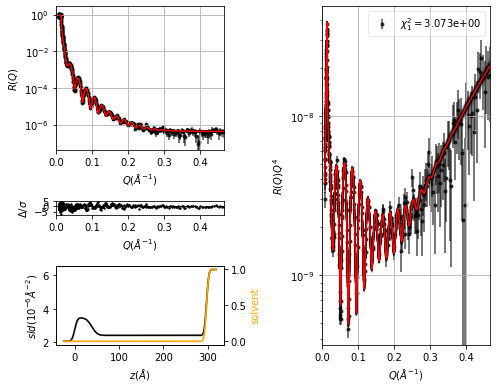

--------------------------------------------------------------------
Final model parameters
--------------------------------------------------------------------


Curve #0


Instrumental Resolution, dQ/Q: pointwise
fit weigth: 1
--------------------------------------------------------------------
Si real sld (10^-6 A^-2)      = 2.07 (fixed)
Si imaginary sld (10^-6 A^-2) = 0.00 (fixed)
Si thickness (A)              = 0.00 (fixed)
Si/SiO2 roughness (A) = 5.00 (parametric), -> p0
Si solvent volume fraction    = 0.00 (fixed)
--------------------------------------------------------------------
SiO2 real sld (10^-6 A^-2)      = 3.47 (fixed)
SiO2 imaginary sld (10^-6 A^-2) = 0.00 (fixed)
SiO2 thickness (A)              = 38.12 (parametric), -> p1
SiO2/Polymer roughness (A) = 8.41 (parametric), -> p2
SiO2 solvent volume fraction    = 0.00 (fixed)
--------------------------------------------------------------------
Polymer real sld (10^-6 A^-2)      = 2.47 (parametric), -> p3
Polymer imaginary 

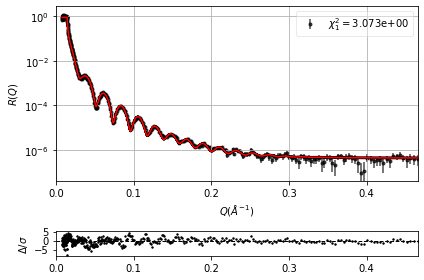

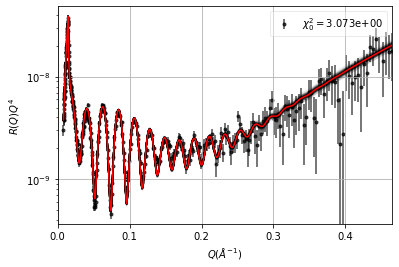

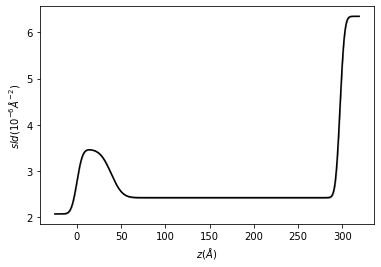

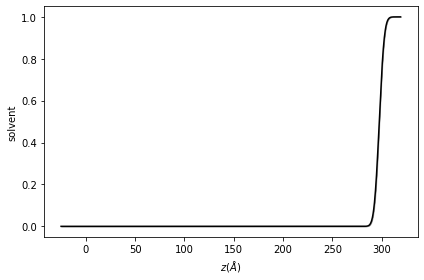

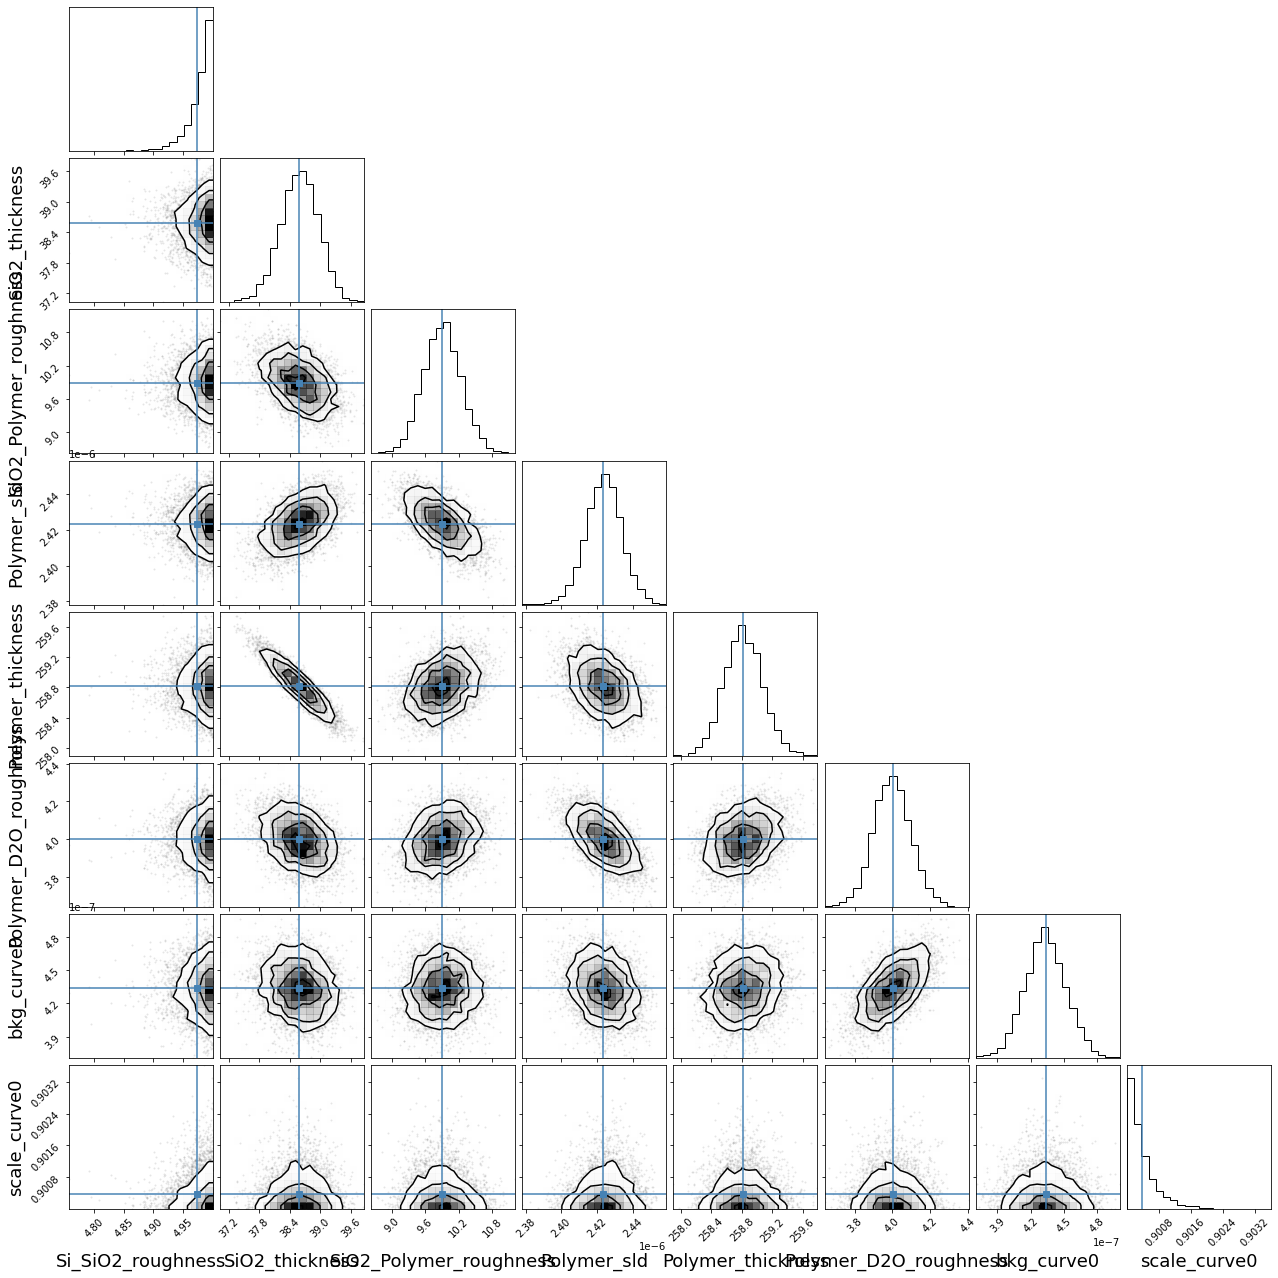

In [10]:
fit_mode=0 # using FOM1
fit_weight=[1] 
method = 'mcmc' # Markov chain Monte Carlo sampling

res = ref.fit(project, in_file, units, fit_mode,
fit_weight,method,resolution,patches, system,
global_param,multi_param, constraints,
background,scale,experror=True)

As you may see almost all parameters of the model are not correlated, with the small exception of the SiO2 thickness and Polymer thickness where a moderate covariance is observed.